In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import tqdm
import faiss
  
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input




In [12]:
image_list =  glob.glob('images/*.jpg')
len(image_list)

20

In [13]:
class FeatureExtract_VGG16:
    def __init__(self):

        self.vgg16 = VGG16(weights='imagenet', include_top=False,pooling='avg',input_shape=(224,224,3))
    
    # function to extract features from images
    def extractFeat(self,fileName):
        img = image.load_img(fileName, target_size=(224, 224))
        img_array = image.img_to_array(img)
        # expand_dims for image
        img_array = np.expand_dims(img_array, axis=0)
        # preprocess the image
        img_array = preprocess_input(img_array)

        # extract features of the image using vgg16
        feat = self.vgg16.predict(img_array)
        # L2归一化
        feat = feat[0] / np.linalg.norm(feat[0])

        return feat

class FeatureExtract_ResNet50:
    def __init__(self):

        self.resnet50 = ResNet50(weights='imagenet', include_top=False,pooling='avg',input_shape=(224,224,3))
    
    # function to extract features from images
    def extractFeat(self,fileName):
        img = image.load_img(fileName, target_size=(224, 224))
        img_array = image.img_to_array(img)
        # expand_dims for image
        img_array = np.expand_dims(img_array, axis=0)
        # preprocess the image
        img_array = preprocess_input(img_array)

        # extract features of the image using resnet50
        feat = self.resnet50.predict(img_array)
        # L2归一化
        feat = feat[0] / np.linalg.norm(feat[0])

        return feat

In [14]:
# extract features from images using VGG16

feature_extract_vgg16 = FeatureExtract_VGG16()
feature_extract_resnet50 = FeatureExtract_ResNet50()

feat_list_vgg16 = []
feat_list_resnet50 = []

In [15]:
# 文件名列表
name_list_vgg = []
for img_file in tqdm.tqdm(image_list) :
    # 提取特征
    feat_vec = feature_extract_vgg16.extractFeat(img_file)
    # 将特征加入列表
    feat_list_vgg16.append(feat_vec)
    # 解析文件
    name = img_file.split(os.sep)[-1].split('.')[0]
    # 将文件名加入列表
    name_list_vgg.append(name)

name_list_resnet = []
for img_file in tqdm.tqdm(image_list) :
    # 提取特征
    feat_vec = feature_extract_resnet50.extractFeat(img_file)
    # 将特征加入列表
    feat_list_resnet50.append(feat_vec)
    # 解析文件
    name = img_file.split(os.sep)[-1].split('.')[0]
    # 将文件名加入列表
    name_list_resnet.append(name)

  0%|          | 0/20 [00:00<?, ?it/s]

1/1 [==============================] - 1s 558ms/step


  5%|▌         | 1/20 [00:00<00:13,  1.44it/s]

1/1 [==============================] - 0s 182ms/step


 10%|█         | 2/20 [00:00<00:07,  2.39it/s]

1/1 [==============================] - 0s 150ms/step


 15%|█▌        | 3/20 [00:01<00:05,  3.07it/s]

1/1 [==============================] - 0s 163ms/step


 20%|██        | 4/20 [00:01<00:04,  3.58it/s]

1/1 [==============================] - 0s 160ms/step


 25%|██▌       | 5/20 [00:01<00:03,  3.92it/s]

1/1 [==============================] - 0s 146ms/step


 30%|███       | 6/20 [00:01<00:03,  4.17it/s]

1/1 [==============================] - 0s 143ms/step


 35%|███▌      | 7/20 [00:01<00:02,  4.45it/s]

1/1 [==============================] - 0s 141ms/step


 40%|████      | 8/20 [00:02<00:02,  4.75it/s]

1/1 [==============================] - 0s 146ms/step


 45%|████▌     | 9/20 [00:02<00:02,  4.81it/s]

1/1 [==============================] - 0s 161ms/step


 50%|█████     | 10/20 [00:02<00:02,  4.78it/s]

1/1 [==============================] - 0s 174ms/step


 55%|█████▌    | 11/20 [00:02<00:01,  4.59it/s]

1/1 [==============================] - 0s 146ms/step


 60%|██████    | 12/20 [00:02<00:01,  4.81it/s]

1/1 [==============================] - 0s 190ms/step


 65%|██████▌   | 13/20 [00:03<00:01,  4.60it/s]

1/1 [==============================] - 0s 145ms/step


 70%|███████   | 14/20 [00:03<00:01,  4.80it/s]

1/1 [==============================] - 0s 153ms/step


 75%|███████▌  | 15/20 [00:03<00:01,  4.85it/s]

1/1 [==============================] - 0s 154ms/step


 80%|████████  | 16/20 [00:03<00:00,  4.85it/s]

1/1 [==============================] - 0s 178ms/step


 85%|████████▌ | 17/20 [00:04<00:00,  3.91it/s]

1/1 [==============================] - 0s 144ms/step


 90%|█████████ | 18/20 [00:04<00:00,  4.21it/s]

1/1 [==============================] - 0s 177ms/step


 95%|█████████▌| 19/20 [00:04<00:00,  4.26it/s]

1/1 [==============================] - 0s 146ms/step


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 [==============================] - 1s 991ms/step


  5%|▌         | 1/20 [00:01<00:20,  1.08s/it]

1/1 [==============================] - 0s 116ms/step


 10%|█         | 2/20 [00:01<00:09,  1.82it/s]

1/1 [==============================] - 0s 105ms/step


 15%|█▌        | 3/20 [00:01<00:06,  2.71it/s]

1/1 [==============================] - 0s 95ms/step


 20%|██        | 4/20 [00:01<00:04,  3.61it/s]

1/1 [==============================] - 0s 122ms/step


 25%|██▌       | 5/20 [00:01<00:03,  4.21it/s]

1/1 [==============================] - 0s 110ms/step


 30%|███       | 6/20 [00:01<00:02,  4.77it/s]

1/1 [==============================] - 0s 104ms/step


 35%|███▌      | 7/20 [00:02<00:02,  5.25it/s]

1/1 [==============================] - 0s 96ms/step


 40%|████      | 8/20 [00:02<00:02,  5.76it/s]

1/1 [==============================] - 0s 122ms/step


 45%|████▌     | 9/20 [00:02<00:01,  5.86it/s]

1/1 [==============================] - 0s 107ms/step


 50%|█████     | 10/20 [00:02<00:01,  5.84it/s]

1/1 [==============================] - 0s 109ms/step


 55%|█████▌    | 11/20 [00:02<00:01,  6.06it/s]

1/1 [==============================] - 0s 95ms/step


 60%|██████    | 12/20 [00:02<00:01,  6.41it/s]

1/1 [==============================] - 0s 97ms/step


 65%|██████▌   | 13/20 [00:02<00:01,  6.66it/s]

1/1 [==============================] - 0s 97ms/step


 70%|███████   | 14/20 [00:03<00:00,  6.83it/s]

1/1 [==============================] - 0s 98ms/step


 75%|███████▌  | 15/20 [00:03<00:00,  6.88it/s]

1/1 [==============================] - 0s 102ms/step


 80%|████████  | 16/20 [00:03<00:00,  6.86it/s]

1/1 [==============================] - 0s 99ms/step


 85%|████████▌ | 17/20 [00:03<00:00,  6.85it/s]

1/1 [==============================] - 0s 93ms/step


 90%|█████████ | 18/20 [00:03<00:00,  7.01it/s]

1/1 [==============================] - 0s 97ms/step


 95%|█████████▌| 19/20 [00:03<00:00,  7.10it/s]

1/1 [==============================] - 0s 97ms/step


100%|██████████| 20/20 [00:03<00:00,  5.13it/s]


In [17]:
name_list_vgg = np.array(name_list_vgg)
np.save('./image_feature/name_list_vgg.npy',name_list_vgg)

index_vgg = faiss.IndexFlatL2(512)
feat_list_vgg16 = np.array(feat_list_vgg16)
index_vgg.add(feat_list_vgg16)
faiss.write_index(index_vgg, './faiss_lib/voc_vgg.index')


name_list_resnet = np.array(name_list_resnet)
np.save('./image_feature/name_list_resnet.npy',name_list_resnet)

index_resnet = faiss.IndexFlatL2(2048)
feat_list_resnet50 = np.array(feat_list_resnet50, dtype=np.float32)
index_resnet.add(feat_list_resnet50)
faiss.write_index(index_resnet, './faiss_lib/voc_resnet.index')
index_resnet.ntotal



20

In [ ]:
index_vgg = faiss.read_index('./faiss_lib/voc_vgg.index')
name_list_vgg = np.load('./image_feature/name_list_vgg.npy')

index_resnet = faiss.read_index('./faiss_lib/voc_resnet.index')
name_list_resnet = np.load('./image_feature/name_list_resnet.npy')

1/1 [==============================] - 0s 104ms/step


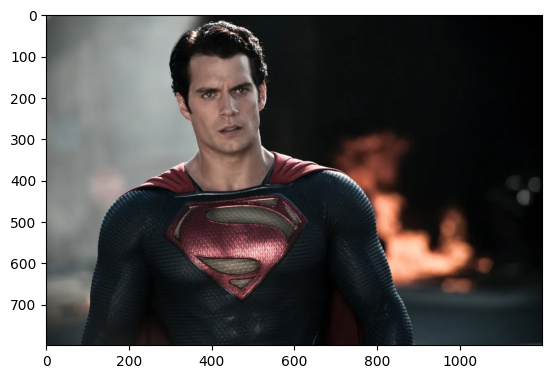

In [18]:
search_image = './search_images/superman.jpg'

#display the search image
plt.imshow(cv2.cvtColor(cv2.imread(search_image), cv2.COLOR_BGR2RGB))
#extract features from the search image
feat_vec = feature_extract_vgg16.extractFeat(search_image)
#expand the dimension of the feature vector
feat_vec = np.expand_dims(feat_vec, axis=0)

k = 10
D, I = index_vgg.search(feat_vec, k)

feat_vec_resnet = feature_extract_resnet50.extractFeat(search_image)
feat_vec_resnet = np.expand_dims(feat_vec_resnet, axis=0)
k=10
D1, I1 = index_resnet.search(feat_vec_resnet, k)

/var/folders/zk/_ry6kb852zb7th8syz9wtgf00000gn/T/ipykernel_88881/308097267.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, i+1)


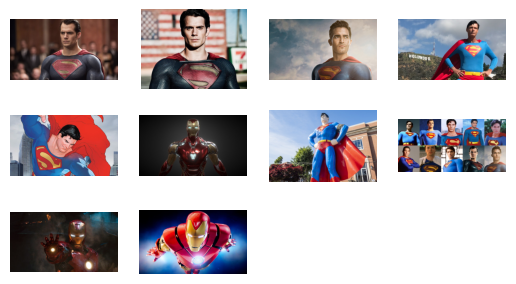

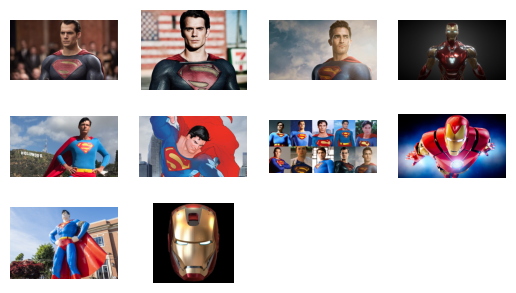

In [19]:
plt.imshow(cv2.cvtColor(cv2.imread(search_image), cv2.COLOR_BGR2RGB))
select_file_list = name_list_vgg[I[0]]
fig = plt.Figure(figsize=(10, 10))
for i,file_name in enumerate(select_file_list):
    # 组装文件名
    file_name = './images/' + file_name + '.jpg'
    # 加载图片
    img = cv2.imread(file_name)
    # plt显示
    plt.subplot(4, 4, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

select_file_list = name_list_resnet[I1[0]]
fig = plt.Figure(figsize=(10, 10))
for i,file_name in enumerate(select_file_list):
    # 组装文件名
    file_name = './images/' + file_name + '.jpg'
    # 加载图片
    img = cv2.imread(file_name)
    # plt显示
    plt.subplot(4, 4, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

In [20]:
import numpy as np
from PIL import Image

# Load and preprocess the images
image_paths = [f'./images/puppies{i}.jpg' for i in range(1, 11)]

images = []
for path in image_paths:
    img = Image.open(path).convert('RGB')  # Load the image
    img = img.resize((256, 256))  # Resize the image to 256x256
    img_array = np.array(img) / 255.0  # Convert to numpy array and normalize to [0, 1]
    img_array = (img_array - 0.5) * 2  # Rescale pixel values to [-1, 1]
    images.append(img_array)

images = np.array(images)

# Split the dataset into inputs and targets
input_images = images[2:4]
target_images = images[2:4]

In [21]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Concatenate, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def build_generator():
    def conv_block(x, filters, kernel_size=4, strides=2, padding='same', activation=True, batch_norm=True):
        x = Conv2D(filters, kernel_size, strides=strides, padding=padding)(x)
        if activation:
            x = Activation('relu')(x)
        if batch_norm:
            x = BatchNormalization()(x)
        return x

    def deconv_block(x, concat_tensor, filters, kernel_size=4, strides=2, padding='same', activation=True, batch_norm=True):
        x = Conv2DTranspose(filters, kernel_size, strides=strides, padding=padding)(x)
        if activation:
            x = Activation('relu')(x)
        if batch_norm:
            x = BatchNormalization()(x)
        return Concatenate()([x, concat_tensor])

    input_layer = Input(shape=(256, 256, 3))
    x1 = conv_block(input_layer, 64, batch_norm=False)
    x2 = conv_block(x1, 128)
    x3 = conv_block(x2, 256)
    x4 = conv_block(x3, 512)
    x5 = conv_block(x4, 512)
    x6 = conv_block(x5, 512)
    x7 = conv_block(x6, 512, activation=False)

    d1 = deconv_block(x7, x6, 512)
    d2 = deconv_block(d1, x5, 512)
    d3 = deconv_block(d2, x4, 512)
    d4 = deconv_block(d3, x3, 256)
    d5 = deconv_block(d4, x2, 128)
    d6 = deconv_block(d5, x1, 64)

    output_layer = Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh')(d6)

    return Model(input_layer, output_layer)


In [23]:
def build_discriminator():
    def conv_block(x, filters, kernel_size=4, strides=2, padding='same', activation=True, batch_norm=True):
        x = Conv2D(filters, kernel_size, strides=strides, padding=padding)(x)
        if activation:
            x = Activation('relu')(x)
        if batch_norm:
            x = BatchNormalization()(x)
        return x

    input_layer = Input(shape=(256, 256, 6))  # 3 channels for input, 3 channels for target
    x = conv_block(input_layer, 64, batch_norm=False)
    x = conv_block(x, 128)
    x = conv_block(x, 256)
    x = conv_block(x, 512, strides=1)

    output_layer = Conv2D(1, 4, strides=1, padding='same')(x)

    return Model(input_layer, output_layer)

# Define the generator and discriminator
generator = build_generator()
discriminator = build_discriminator()

# Compile the discriminator model
discriminator.compile(optimizer=Adam(lr=0.0002, beta_1=0.5), loss=BinaryCrossentropy(from_logits=True))

# Define the cGAN model
input_image = Input(shape=(256, 256, 3))
generated_image = generator(input_image)

discriminator.trainable = False
validity = discriminator(Concatenate(axis=-1)([input_image, generated_image]))

combined = Model(input_image, [validity, generated_image])

optimizer = Adam(lr=0.0002, beta_1=0.5)
bce_loss = BinaryCrossentropy(from_logits=True)
combined.compile(loss=[bce_loss, 'mae'], optimizer=optimizer, loss_weights=[1, 100])

# Continue with the rest of the training code




In [26]:
# Training
epochs = 10

batch_size = 1  # Since there are only 10 images, it's better to use a batch size of 1
num_batches = len(input_images) // batch_size

real_labels = np.ones((batch_size, 32, 32, 1))
fake_labels = np.zeros((batch_size, 32, 32, 1))

for epoch in range(epochs):
    for batch_idx in range(num_batches):
        # Train the discriminator
        input_batch = input_images[batch_idx * batch_size: (batch_idx + 1) * batch_size]
        target_batch = target_images[batch_idx * batch_size: (batch_idx + 1) * batch_size]

        generated_images = generator.predict(input_batch)
        real_loss = discriminator.train_on_batch(np.concatenate([input_batch, target_batch], axis=-1), real_labels)
        fake_loss = discriminator.train_on_batch(np.concatenate([input_batch, generated_images], axis=-1), fake_labels)

        d_loss = 0.5 * np.add(real_loss, fake_loss)

        # Train the generator
        g_loss = combined.train_on_batch(input_batch, [real_labels, target_batch])

        print(f"[Epoch {epoch}/{epochs}] [Batch {batch_idx}/{num_batches}] [D loss: {d_loss}] [G loss: {g_loss}]")

# Test the generator with an input image
test_image = input_images[0:1]  # Select one image from the input_images
generated_image = generator.predict(test_image)

1/1 [==============================] - 1s 735ms/step
[Epoch 0/10] [Batch 0/2] [D loss: 1.8514131605625153] [G loss: [58.993900299072266, 0.49185776710510254, 0.5850204229354858]]
1/1 [==============================] - 0s 115ms/step
[Epoch 0/10] [Batch 1/2] [D loss: 2.629586100578308] [G loss: [35.652523040771484, 0.788075864315033, 0.348644495010376]]
1/1 [==============================] - 0s 117ms/step
[Epoch 1/10] [Batch 0/2] [D loss: 2.0205660462379456] [G loss: [32.817874908447266, 0.6538074016571045, 0.32164067029953003]]
1/1 [==============================] - 0s 177ms/step
[Epoch 1/10] [Batch 1/2] [D loss: 1.6432636976242065] [G loss: [21.733802795410156, 0.6202040910720825, 0.21113598346710205]]
1/1 [==============================] - 0s 123ms/step
[Epoch 2/10] [Batch 0/2] [D loss: 2.0102561116218567] [G loss: [25.288312911987305, 0.5664258003234863, 0.24721887707710266]]
1/1 [==============================] - 0s 126ms/step
[Epoch 2/10] [Batch 1/2] [D loss: 1.2041046619415283] [G

In [39]:
def convert_image(img):
    return (img + 1) / 2
image_path ='./search_images/superman2.jpg'
# image_path = './images/puppies4.jpg'
image_path = './search_images/superman2.jpg'
  # Rescale pixel values to [-1, 1]
    
images = []

img = Image.open(image_path).convert('RGB')  # Load the image
img = img.resize((256, 256))  # Resize the image to 256x256
img_array = np.array(img) / 255.0  # Convert to numpy array and normalize to [0, 1]
img_array = (img_array - 0.5) * 2  # Rescale pixel values to [-1, 1]
images.append(img_array)

images = np.array(images)
# Generate the image
test_image = images[0:1]  # Select one image from the input_images
generated_image = generator.predict(test_image)


1/1 [==============================] - 1s 830ms/step


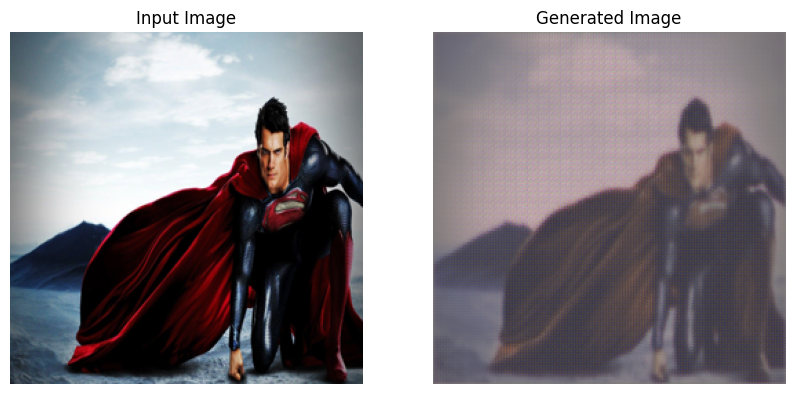

MSE similarity: 0.04853741514300846


In [40]:
test_image = convert_image(test_image[0])
generated_image = convert_image(generated_image[0])

# Display the input and generated images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(generated_image)
plt.title('Generated Image')
plt.axis('off')

plt.show()

def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

mse_similarity = mse(test_image, generated_image)
print("MSE similarity:", mse_similarity)

In [ ]:
# Load the pre-trained Haar Cascade face classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the input image
image = cv2.imread('./search_images/superman.jpg')

# Convert the image to grayscale for better face detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)

# Print the number of faces detected
print(f"Number of faces detected: {len(faces)}")

# Draw red rectangles around the detected faces
for (x, y, width, height) in faces:
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 0, 255), 2)

# Display the image with the detected faces
cv2.imshow('Detected Faces', image)

# Wait for a key press and close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of faces detected: 2


: 